# Titanic.csv

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Types of features in titanic

**Categorical**: is a collection of information that is divided into groups.
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

**Ordinal**: They are similar to categorical features but they have an order.
Eg. Pclass (1, 2, 3)

**Binary**: A categrorical feature which has only 2 types of categories.Which is often represted as 0 and 1.
Eg: Sex (Male/Female)

**Continuous**: They can take up any value between the minimum and maximum values in a column.
Eg. Age, Fare

**Count**: They represent the count of a variable.
Eg. SibSp, Parch

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above,we can see that the age of passengers ranges between 0.4 to 80 years.And 38% of the people survived 
whose records are mentioned in this training set.

<h1><center>Titanic EDA</center></h1>

In [45]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### "타이타닉의 승객은 20대가 가장 많다."

<AxesSubplot:ylabel='Frequency'>

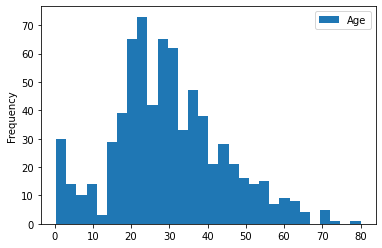

In [46]:
# 나이 분포
titanic.plot(kind='hist', y='Age', bins=30)

### "가장 높은 요금을 낸 사람은 30대이다."

<AxesSubplot:xlabel='Age', ylabel='Fare'>

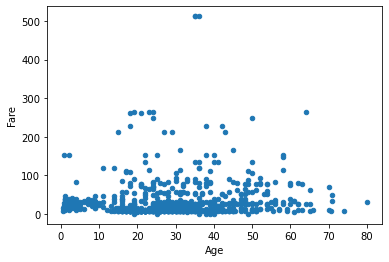

In [47]:
# 나이별 요금 분포
titanic.plot(kind='scatter', x='Age', y='Fare')

### "사망자가 생존자보다 더 많다."

In [48]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### "1등실, 2등실, 3등실 중 가장 많은 사람이 탑승한 곳은 3등실이다."

In [49]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### "가장 생존율이 높은 객실 등급은 1등실이다."

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

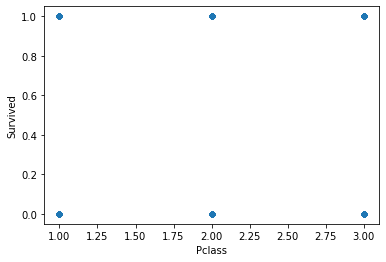

In [50]:
# 객실 등급별 생존율 분포
titanic.plot(kind='scatter', x='Pclass', y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

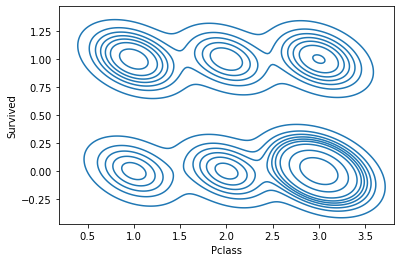

In [51]:
# 객실 등급별 생존율 분포
sns.kdeplot(titanic['Pclass'], titanic['Survived'])

### "나이가 어릴수록 생존율이 높다고 보기 어렵다."

<AxesSubplot:xlabel='Survived', ylabel='Age'>

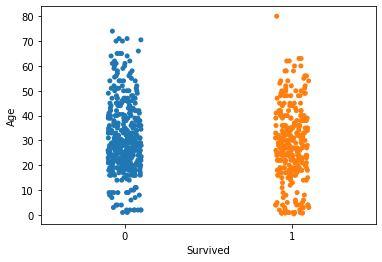

In [52]:
# 생존 여부에 따른 나이 분포
sns.stripplot(data=titanic, x="Survived", y="Age")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

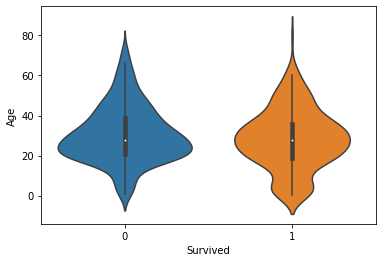

In [53]:
# 생존 여부에 따른 나이 분포
sns.violinplot(data=titanic, x="Survived", y="Age")

### "나이보다 성별이 생존율에 더 많은 영향을 미친다."

<AxesSubplot:xlabel='Survived', ylabel='Age'>

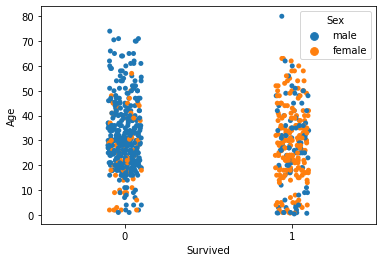

In [54]:
# 생존 여부에 따른 나이 및 성별 분포
sns.stripplot(data=titanic, x="Survived", y="Age", hue="Sex")

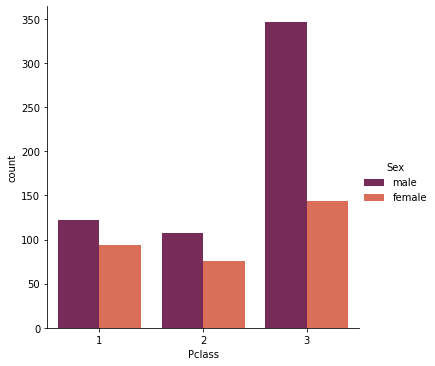

In [10]:
sns.catplot(x='Pclass', data=train,kind='count', hue='Sex',palette='rocket')

Class 3 males are more than 2x of women.

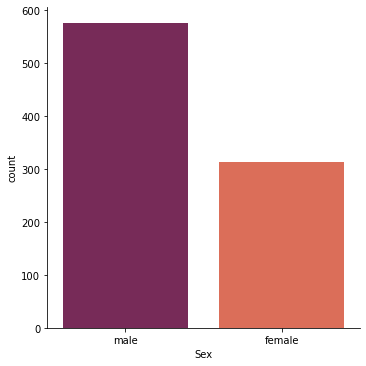

In [11]:
sns.catplot(x = 'Sex',data=train, kind='count',palette='rocket')

The number of male passengers are almost 2x of female passengers appox.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

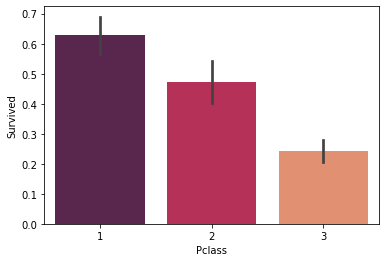

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train,palette='rocket')

Here,we can see that person in class 1 has the higher chances of survival.Where as person in class 3 has lower chance.

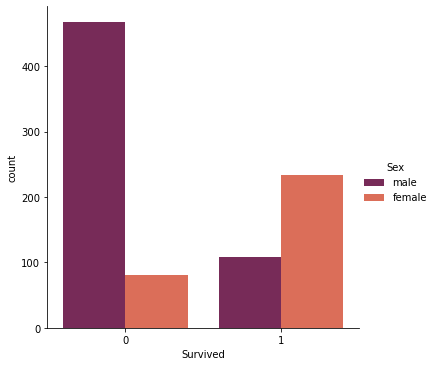

In [13]:
sns.catplot(x ='Survived',data=train, kind='count',hue='Sex',palette='rocket')

Despite the ship being male dominated.The survival rate of women is higher.As we can see that large number of women survived despite being minorities.

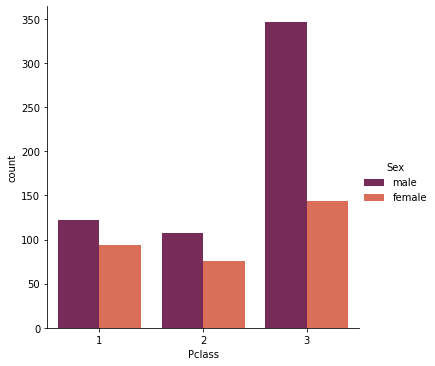

In [14]:
sns.catplot(x='Pclass', data=train,kind='count', hue='Sex',palette='rocket')

In class 3 males are more than 2x of women.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

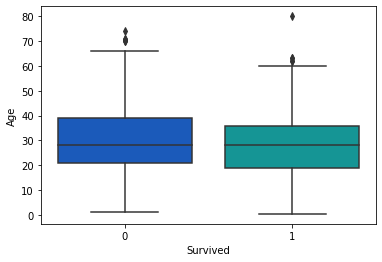

In [15]:
#Age
sns.boxplot(x='Survived',y='Age',data=train,palette='winter')

The average age of people seems to almost same for survived and dead.however we can observe some outliers

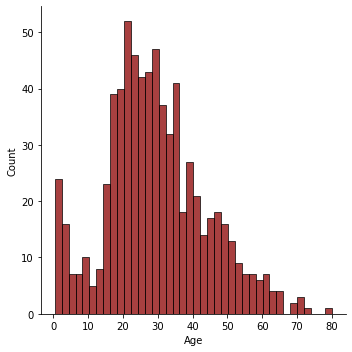

In [16]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

Age distrubution in titanic traning dataset

<AxesSubplot:xlabel='count', ylabel='Age'>

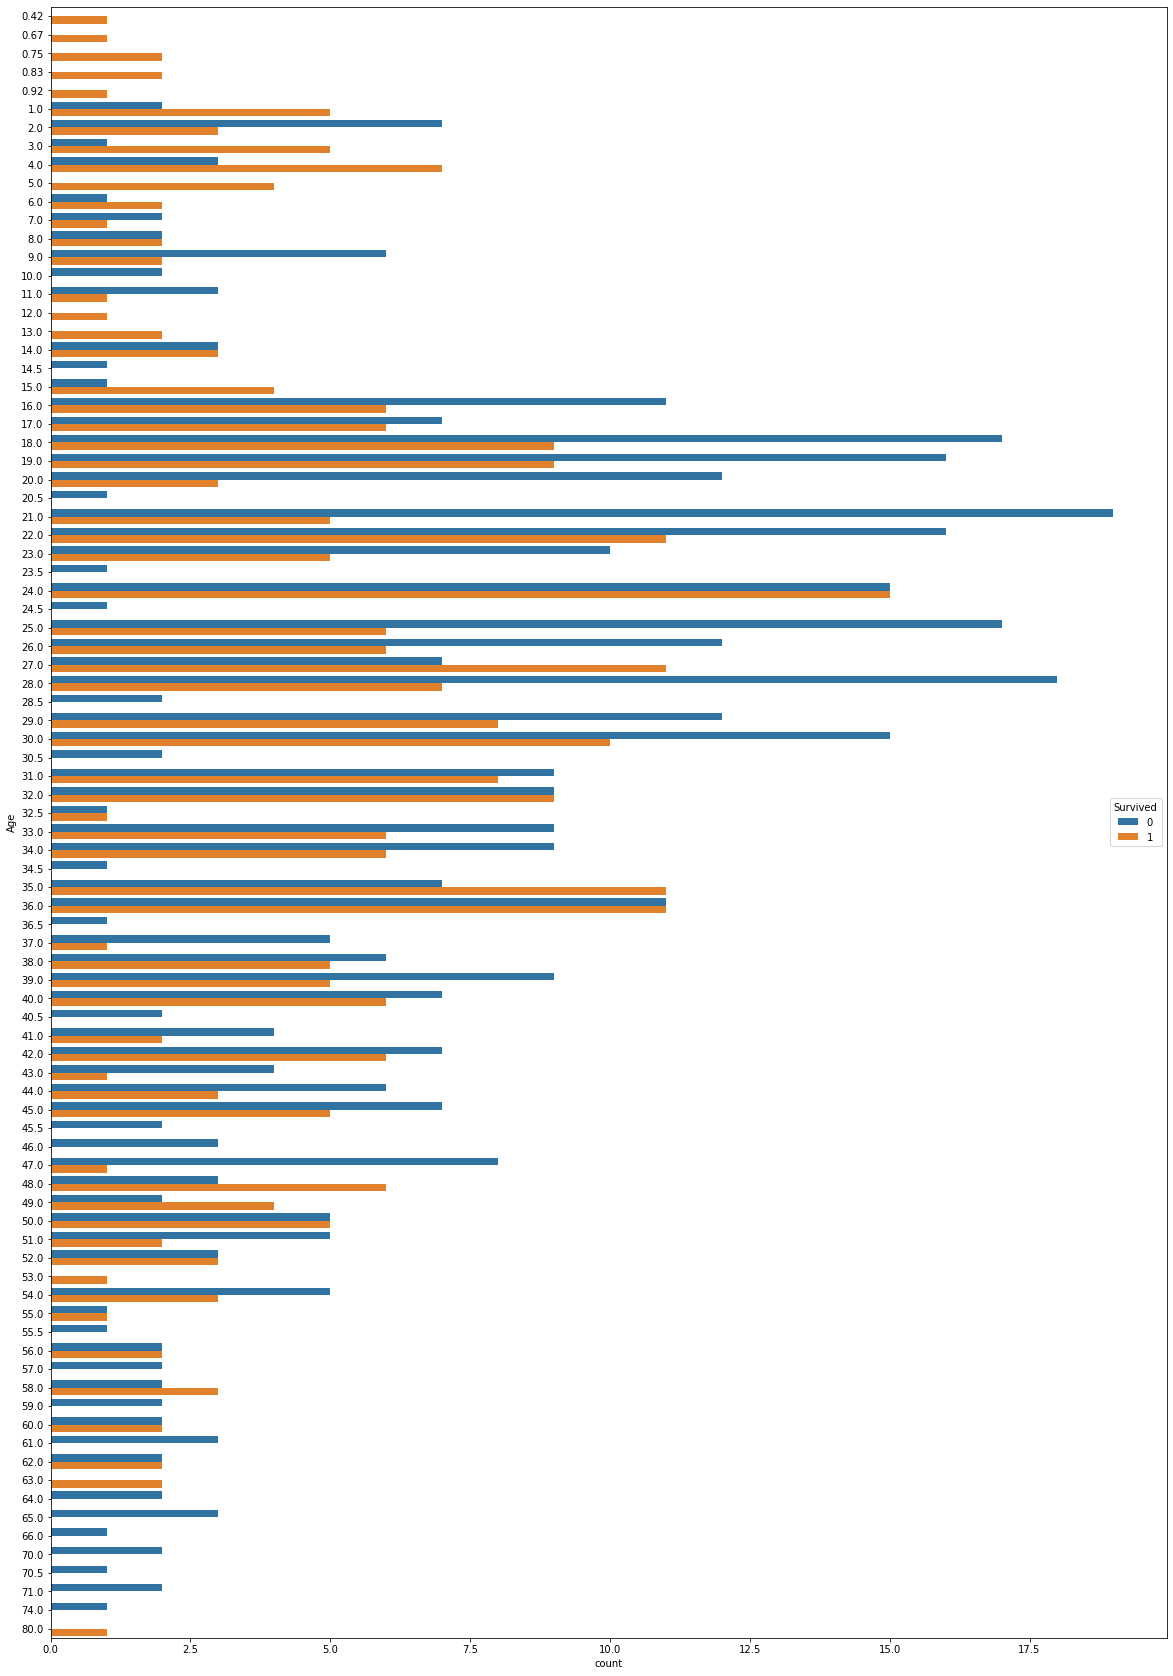

In [17]:
#Survival and dead distribution with respect to age
plt.figure(figsize=(20, 30))
sns.countplot(y = "Age",hue="Survived", data=train)

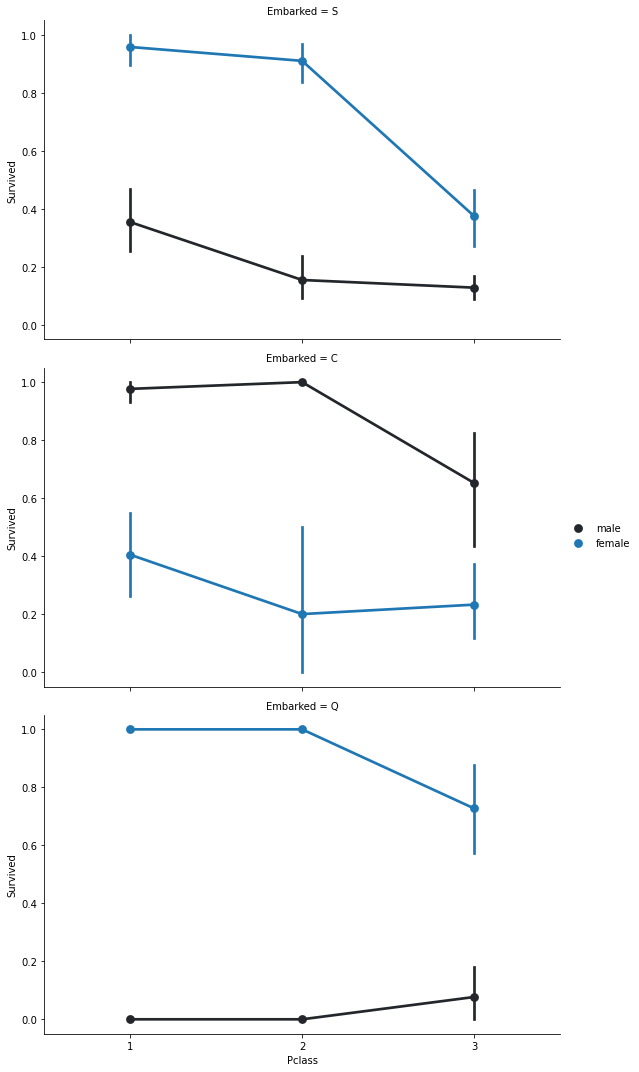

In [18]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Women on port Q and S has higher probability of surviving,Same cannot be said for the women on port C.The probability of men surviving is lower on port Q and S and it is higher in C.

In [19]:
print(train["SibSp"].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


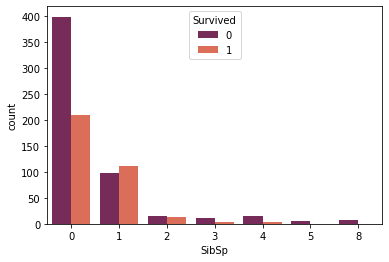

In [20]:
ax = sns.countplot(x = "SibSp",hue="Survived", data=train,palette='rocket')

From the above plot we can see that people with 0 and 1 Sibsp(Sibling or spouse) has greater chance of survival.Maybe because of sibsp with 0 or 1 were present in greater number.

<h1><center>Handling Missing values and imputing it</center></h1>

<AxesSubplot:>

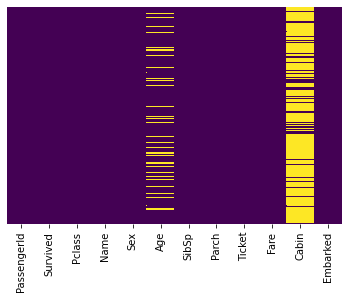

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

All the yellow lines that we see are missing values.We can see that majority of values are missing in cabin and age.

In [22]:
total = train.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

These are the following missing values.

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train.drop(['Name','Ticket','Cabin','Fare'],axis=1,inplace=True)

In [25]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,NaN,1,2,S
889,890,1,1,male,26.0,0,0,C


**Relation ship between PCLASS and AGE**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

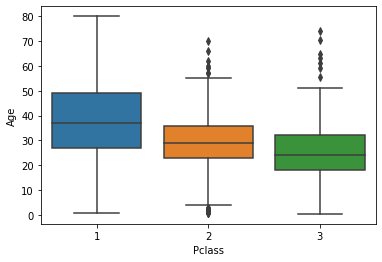

In [26]:
sns.boxplot(x='Pclass',y='Age',data=train)

Filling up mean values for null.

In [27]:
def impute_age_train(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else:
        return Age

In [28]:
def impute_age_test(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else :
            return 25
    else:
        return Age

In [29]:
train['Age']=train[['Age','Pclass']].apply(impute_age_train,axis=1)

In [30]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

S is common in Embarked.We will fill null values with it.

In [31]:
common='S'
train['Embarked'] = train['Embarked'].fillna(common)

In [32]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

# Catogorical features

In [33]:
Embarked = pd.get_dummies(train['Embarked'],drop_first=True)
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
#Converting values
train['Sex']=train['Sex'].map({'male':0,'female':1})
train.drop(['Embarked'],axis=1,inplace=True)

In [35]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0
887,888,1,1,1,19.0,0,0
888,889,0,3,1,24.0,1,2
889,890,1,1,0,26.0,0,0


In [36]:
train = pd.concat([train,Embarked],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Q,S
0,1,0,3,0,22.0,1,0,0,1
1,2,1,1,1,38.0,1,0,0,0
2,3,1,3,1,26.0,0,0,0,1
3,4,1,1,1,35.0,1,0,0,1
4,5,0,3,0,35.0,0,0,0,1


In [37]:
train.loc[train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4

In [38]:
train= train.drop("PassengerId", axis = 1)

In [39]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Q,S
0,0,3,0,1.0,1,0,0,1
1,1,1,1,2.0,1,0,0,0
2,1,3,1,1.0,0,0,0,1
3,1,1,1,2.0,1,0,0,1
4,0,3,0,2.0,0,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,0,1
887,1,1,1,1.0,0,0,0,1
888,0,3,1,1.0,1,2,0,1
889,1,1,0,1.0,0,0,0,0
